# <span style="color:blue"> Laboratorio di simulazione numerica (LSN) </span>

## <span style="color:green">  Esercitazione numerica 11</span>

## <span style="color:lightblue"> Keras - Neural Network Regression

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Esercizio 11.1 

Il primo esercizio richiede di fare esperienza con le reti neurali studiando i risultati del fit lineare di punti, distribuiti con rumore casuale a media nulla, attorno a:
$$f(x)=2x+1$$
al variare del numero di epoche $N_{epochs}$, di punti $N_{train}$ e del rumore $\sigma$.

In [2]:

# Parametri target di f(x) = m*x + b
m = 2 # coefficiente angolare
b = 1 # intercetta

# generate training inputs
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)

y_train_mean = m * x_train + b
y_valid_mean = m * x_valid + b

# Compose the NN model
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

# Compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


2021-08-31 18:29:41.397985: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-08-31 18:29:41.398397: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Ho prodotto 3 diversi validation set utilizzando tre diversi valori della std-dev $\sigma$ del rumore; ho dunque studiato la variazione della *validation loss* in funzione di $N_{epochs}$ ed $N_{train}$

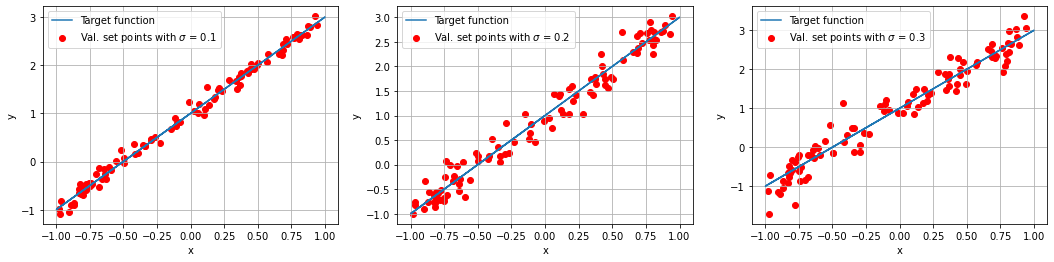

In [3]:
sigmas = [0.1, 0.2, 0.3] # std-dev rumore

plt.figure(1, figsize = (18, 4))
plt.subplot(1, 3, 1)
y_train = np.random.normal(y_train_mean, sigmas[0]) # valori di cui vogliamo ipotizzare i parametri di regressione
y_valid = np.random.normal(y_valid_mean, sigmas[0])
plt.plot(x_train, y_train_mean, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigmas[0]))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True) 

plt.subplot(1, 3, 2)
y_train = np.random.normal(y_train_mean, sigmas[1]) # valori di cui vogliamo ipotizzare i parametri di regressione
y_valid = np.random.normal(y_valid_mean, sigmas[1])
plt.plot(x_train, y_train_mean, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigmas[1]))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
y_train = np.random.normal(y_train_mean, sigmas[2]) # valori di cui vogliamo ipotizzare i parametri di regressione
y_valid = np.random.normal(y_valid_mean, sigmas[2])
plt.plot(x_train, y_train_mean, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigmas[2]))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True)

plt.show()

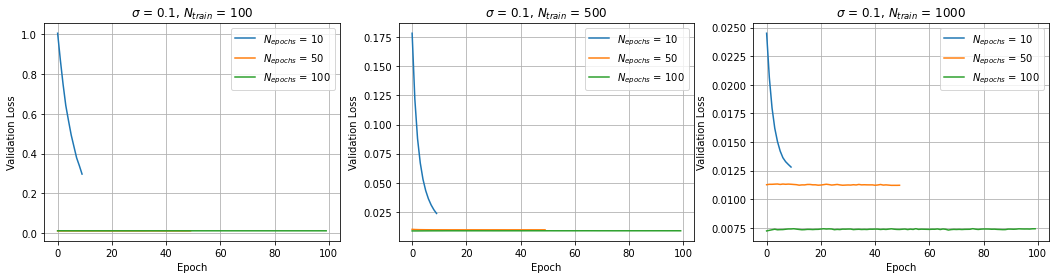

Best validation-loss found for sigma = 0.1 : N_train = 1000 , N_epochs = 100


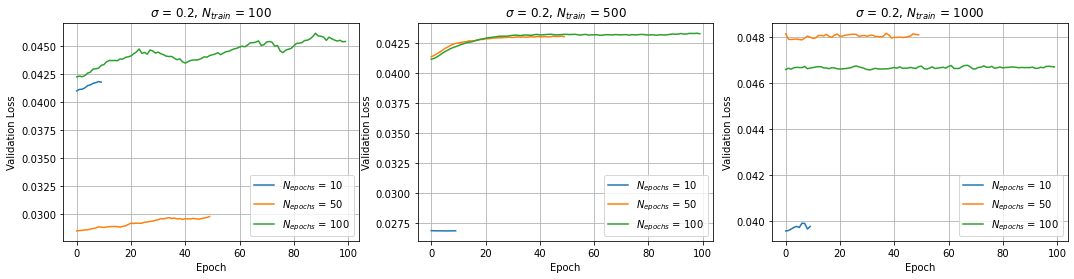

Best validation-loss found for sigma = 0.2 : N_train = 500 , N_epochs = 10


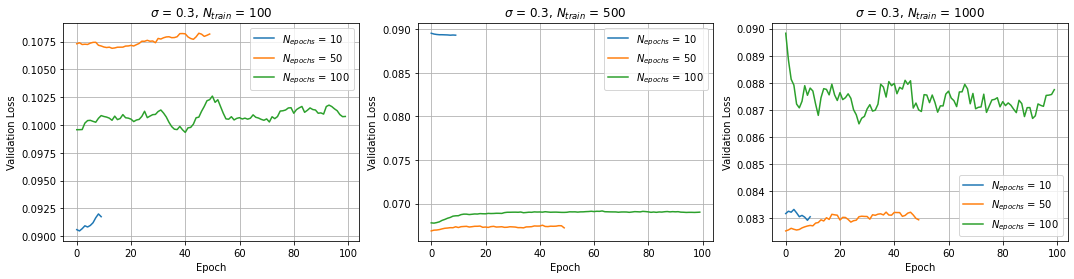

Best validation-loss found for sigma = 0.3 : N_train = 500 , N_epochs = 50


In [4]:
Ns_epochs = [10, 50, 100]
Ns_train = [100, 500, 1000]

best_loss = 1e100 # valore molto alto

index_p = 1
for sigma in sigmas:
    for N_epochs in Ns_epochs:
        index_sp = 1
        for N_train in Ns_train:
            
            y_train = np.random.normal(y_train_mean, sigma) # # valori di cui vogliamo ipotizzare i parametri di regressione
            y_valid = np.random.normal(y_valid_mean, sigma)

            history = model.fit(x=x_train[:N_train], y=y_train[:N_train], 
                                batch_size=32, epochs=N_epochs ,shuffle=True, 
                                validation_data=(x_valid, y_valid), verbose=0)            
            # Plot loss
            plt.figure(index_p, figsize = (18, 4))
            
            plt.subplot(1, 3, index_sp)
            #Train-loss plot
            #plt.plot(history.history['loss'], label="train-loss, $N_{epochs}$ = "
                     #+str(N_epochs))
            plt.plot(history.history['val_loss'], label="$N_{epochs}$ = "
                     +str(N_epochs))
            plt.title("$\sigma$ = "+str(sigma)+", $N_{train}$ = "+str(N_train))
            plt.ylabel('Validation Loss')
            plt.xlabel('Epoch')
            plt.legend()
            plt.grid(True)
            index_sp = index_sp + 1

            # Salvo gli N_epochs e N_train per cui ho trovato il miglior validation-loss
            if( history.history['val_loss'][-1] < best_loss ):
                best_loss=history.history['val_loss'][-1]
                best_N_epochs, best_N_train = N_epochs, N_train
                
    plt.show()
    print("Best validation-loss found for sigma =", sigma, 
          ": N_train =", best_N_train,", N_epochs =", best_N_epochs, )
    best_loss = 1e100 
    index_p = index_p + 1

La prima cosa che si può notare è che aumentando il rumore nel training set, per poter ottenere un minor validation loss, è necessario aumentare la dimensione del training set ed il numero di epoche.
In alcuni casi un minor numero di $N_{epochs}$ risulta in una miglior validation loss: in questi casi è probabile che un numero maggiore di $N_{epochs}$ causi un problema di *overfitting*.

### Esercizio 11.2 

Estendere il modello per ottenere un fit ragionevole della funzione: $$f(x)=4-3x-2x^2+3x^2$$
nell'intervallo $x \in [-1,1]$.

Per prendere familiarità con le reti neurali modificare inoltre il numero di *layer* ed il numero di neuroni in ogni layer ed osservare quale scelta porta risultati migliori.


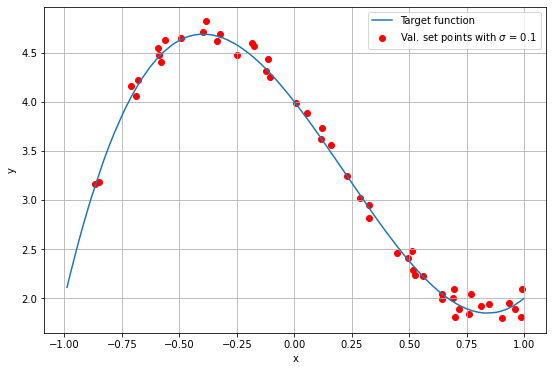

In [5]:
# Genero i punti per plottare la funzione target
x_target = np.random.uniform(-1, 1, 200)
x_target.sort() # sorting to plot target function
y_target = 4. - 3.*x_target - 2.*x_target**2 + 3.*x_target**3
# Generate training inputs
x_train = np.random.uniform(-1, 1, 200)
x_valid = np.random.uniform(-1, 1, 50)

y_target_train = 4. - 3.*x_train - 2.*x_train**2 + 3.*x_train**3
y_target_valid = 4. - 3.*x_valid - 2.*x_valid**2 + 3.*x_valid**3

sigma = 0.1 # rumore
y_train = np.random.normal(y_target_train, sigma)
y_valid = np.random.normal(y_target_valid, sigma)

plt.figure(1, figsize = (9, 6))
plt.plot(x_target, y_target, label="Target function")
plt.scatter(x_valid, y_valid, color='r', label="Val. set points with $\sigma$ = "+str(sigma))
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.grid(True) 

plt.show()

In [6]:
#Definisco una funzione che mi restituisca un modello con: input_shape(1,),'mse metrics'
# e con specifici parametri richiesti: N_layers, N_neurons_per_layer, activ_fn, 
#optim, loss_fn
def get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn):  
    
    model = Sequential()    
    # Aggiungo un input layer
    model.add(Dense(N_neurons_per_layer, activation=activ_fn, input_shape=(1,)))    
    # Aggiungo dei deep layers
    for i in range(1, N_layers-1):
        model.add(Dense(N_neurons_per_layer, activation=activ_fn))        
    # Aggiungo un output layer
    model.add(Dense(1, activation=activ_fn))
    
    model.compile(loss=loss_fn, optimizer=optim, metrics=['mse'])

    return model

Computing NN with : N_layers =  5 , N_neurons_per_layer =  10


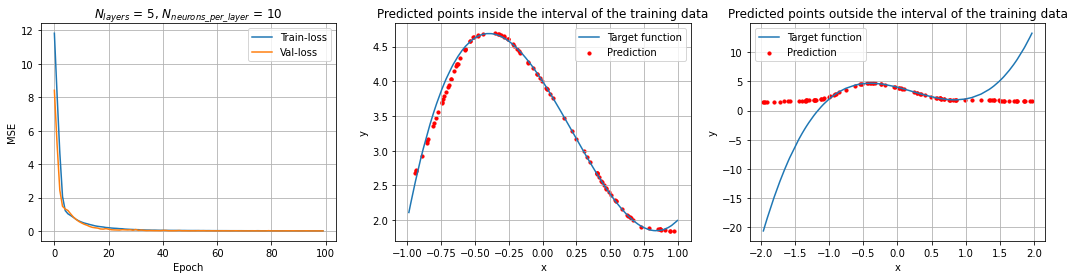

Computing NN with : N_layers =  5 , N_neurons_per_layer =  20


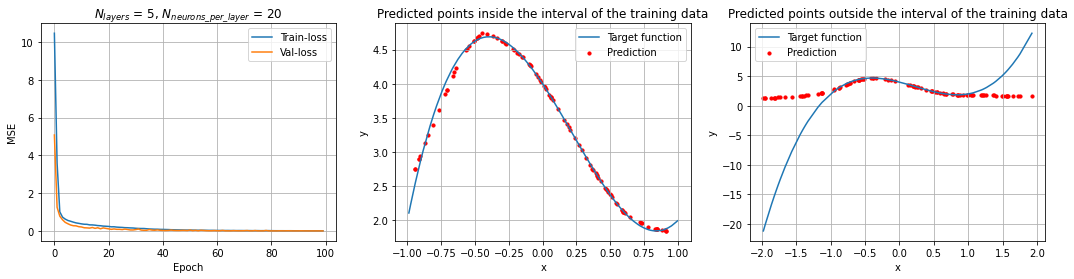

Computing NN with : N_layers =  5 , N_neurons_per_layer =  30


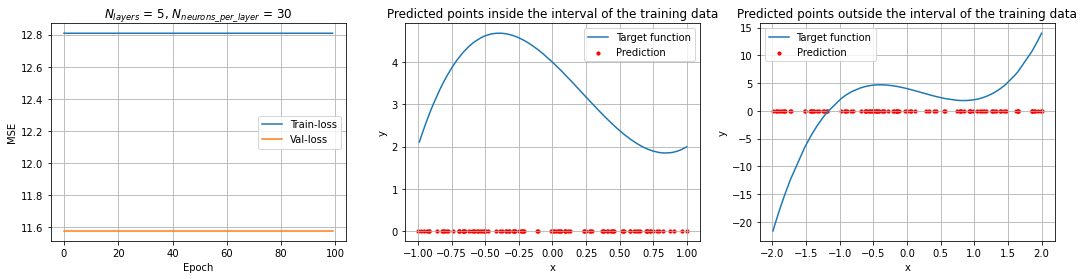

Computing NN with : N_layers =  5 , N_neurons_per_layer =  40


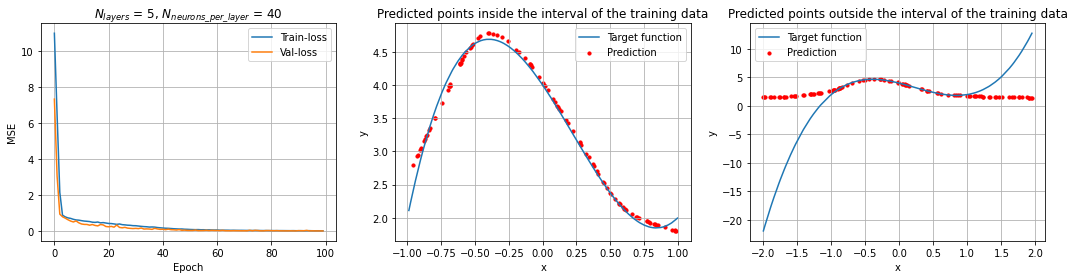

Computing NN with : N_layers =  10 , N_neurons_per_layer =  10


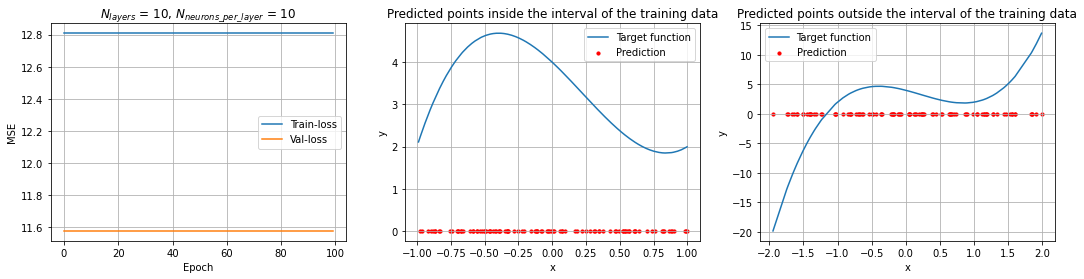

Computing NN with : N_layers =  10 , N_neurons_per_layer =  20


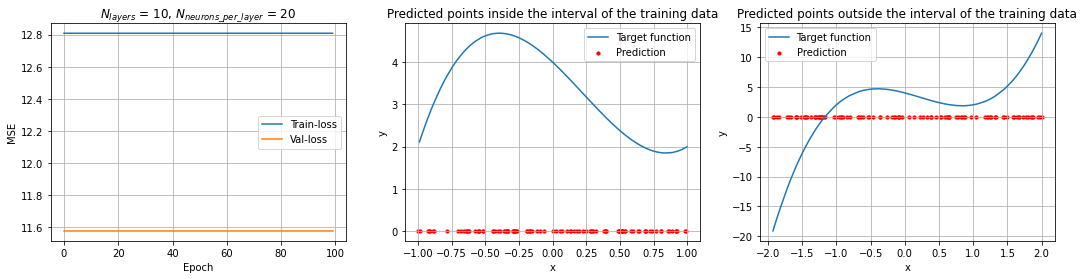

Computing NN with : N_layers =  10 , N_neurons_per_layer =  30


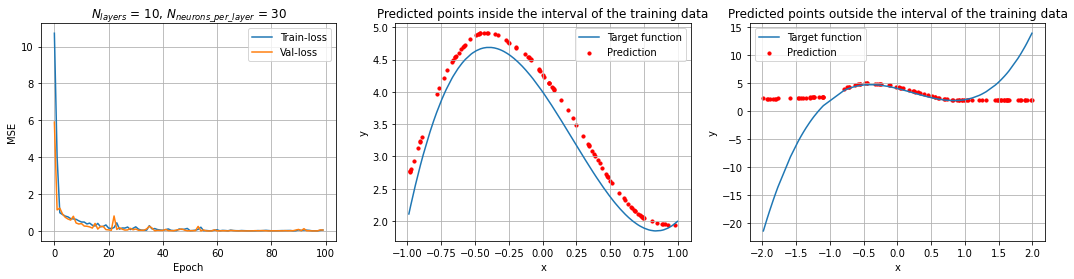

Computing NN with : N_layers =  10 , N_neurons_per_layer =  40


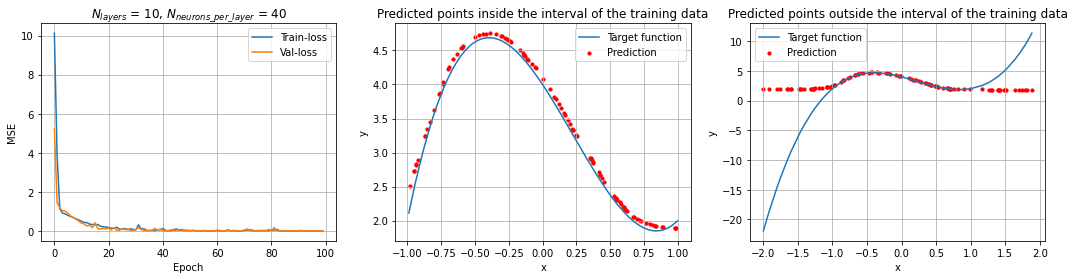

Computing NN with : N_layers =  20 , N_neurons_per_layer =  10


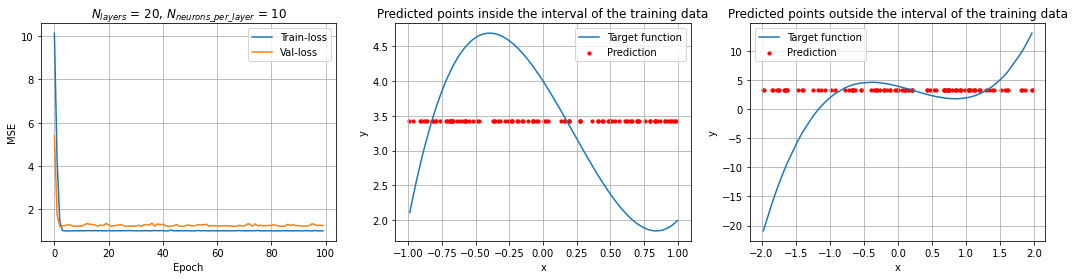

Computing NN with : N_layers =  20 , N_neurons_per_layer =  20


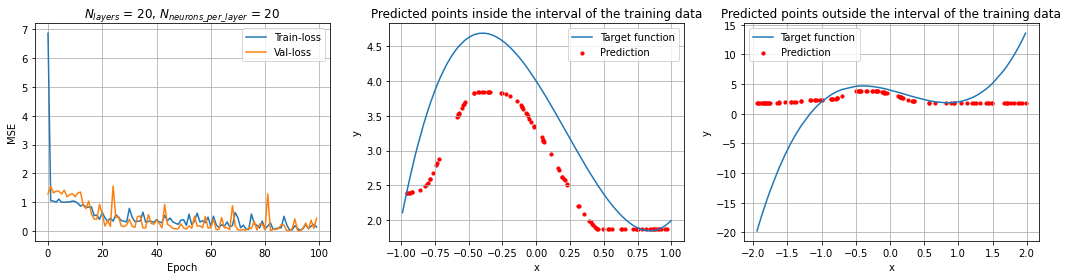

Computing NN with : N_layers =  20 , N_neurons_per_layer =  30


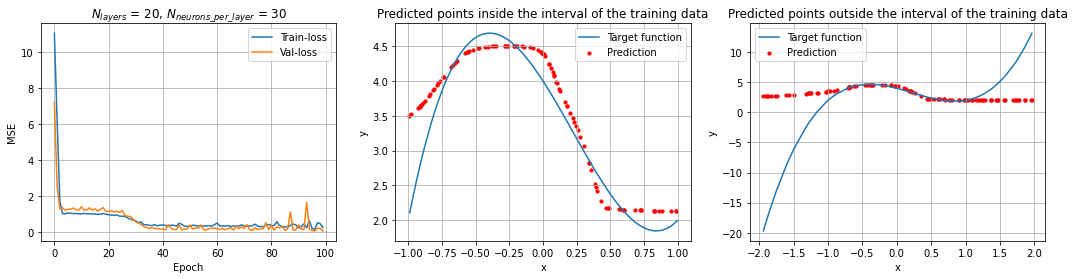

Computing NN with : N_layers =  20 , N_neurons_per_layer =  40


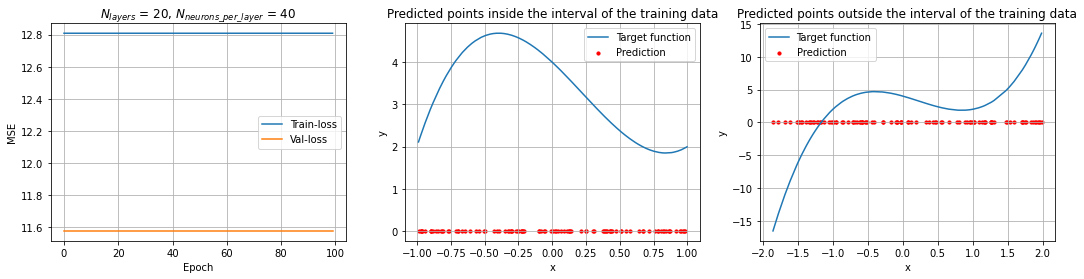

In [7]:
activ_fn = 'relu'
optim = 'sgd'
loss_fn = 'mse'
nepochs = 100

Ns_layers=[5,10,20]
Ns_neurons_per_layer=[10,20,30,40]

index = 1
for N_layers in Ns_layers:
    for N_neurons_per_layer in Ns_neurons_per_layer:
        
        print("Computing NN with : N_layers = ", N_layers,", N_neurons_per_layer = ",N_neurons_per_layer)
        plt.figure(index, figsize = (18, 4))
        
        model = get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)
        #model.summary()
        history = model.fit(x = x_train, y = y_train, batch_size = 32, epochs = nepochs, 
                            shuffle = True, validation_data = (x_valid, y_valid), verbose=0)
        # Plot training & validation loss 
        plt.subplot(1, 3, 1)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title("$N_{layers}$ = "+str(N_layers)+", $N_{neurons\_per\_layer}$ = "+str(N_neurons_per_layer))
        plt.ylabel('MSE')
        plt.xlabel('Epoch')
        plt.legend(['Train-loss', 'Val-loss'], loc='best')
        plt.grid(True)
        # Plot dei punti predetti nell'intervallo richiesto
        plt.subplot(1, 3, 2)
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model.predict(x_predicted)
        plt.scatter(x_predicted, y_predicted,color='r', s=10, label="Prediction")
        plt.plot(x_target, y_target, label="Target function")
        plt.title("Predicted points inside the interval of the training data")
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
        plt.legend()
        # Plot dei punti predetti al di fuori dell'intervallo richiesto
        plt.subplot(1, 3, 3)
        x_test = np.random.uniform(-2, 2, 100)
        y_test = np.random.normal(4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3, sigma)
        x_test.sort() #ordino per plottare la funzione target
        y_test_target = 4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3

        y_predicted = model.predict(x_test)
        
        plt.scatter(x_test, y_predicted,color='r', s=10, label="Prediction")
        plt.plot(x_test, y_test_target, label="Target function")
        plt.title("Predicted points outside the interval of the training data")
        plt.ylabel('y')
        plt.xlabel('x')
        plt.grid(True)
        plt.legend()
       
        plt.show()
        
        index = index + 1

Ho dunque provato a modificare altri parametri, come l'*activation function*, l'*optimizer* e la *loss function*, mantenendo i parametri che sembravano migliori nella simulazione precedente: $N_{layers}=10$ $N_{neurons-per-layer}=40$

Computing NN with: optim = sgd , activ_fn = relu , loss_fn = mean_squared_error


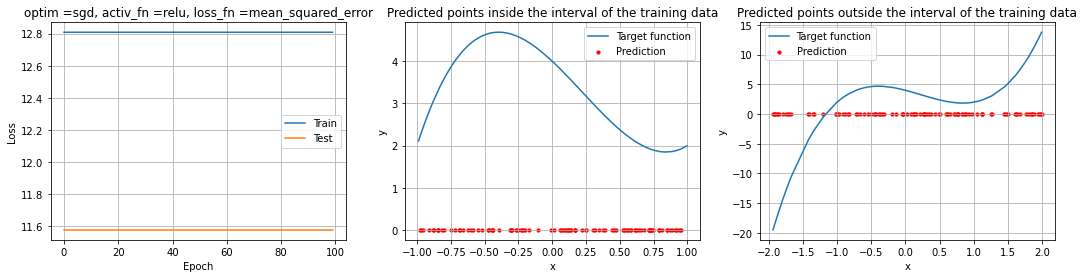

Computing NN with: optim = sgd , activ_fn = relu , loss_fn = mean_absolute_error


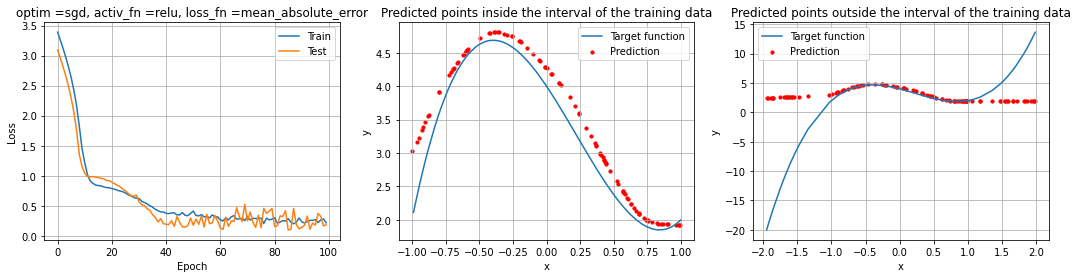

Computing NN with: optim = adam , activ_fn = relu , loss_fn = mean_squared_error


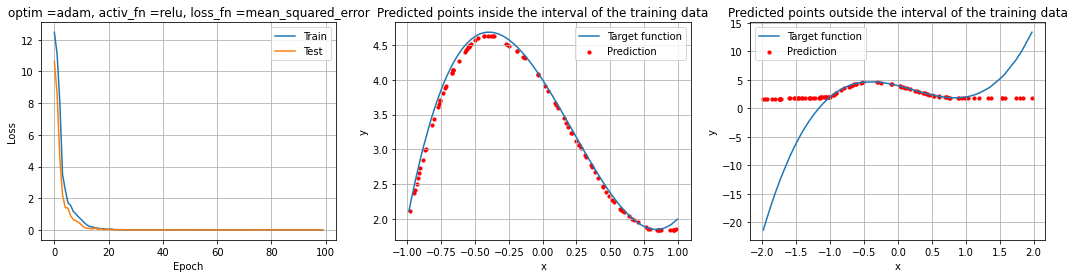

Computing NN with: optim = adam , activ_fn = relu , loss_fn = mean_absolute_error


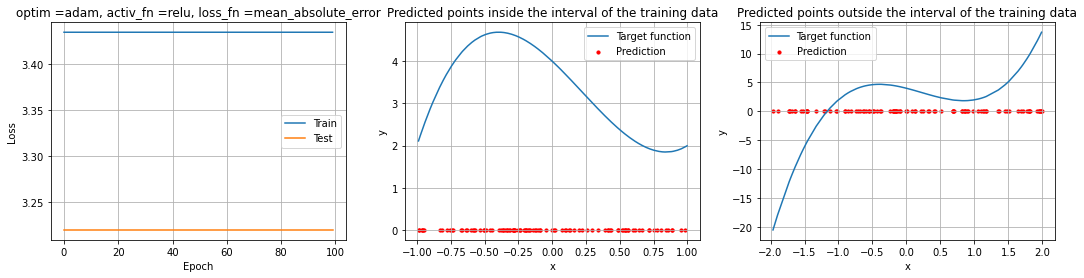

Computing NN with: optim = sgd , activ_fn = elu , loss_fn = mean_squared_error


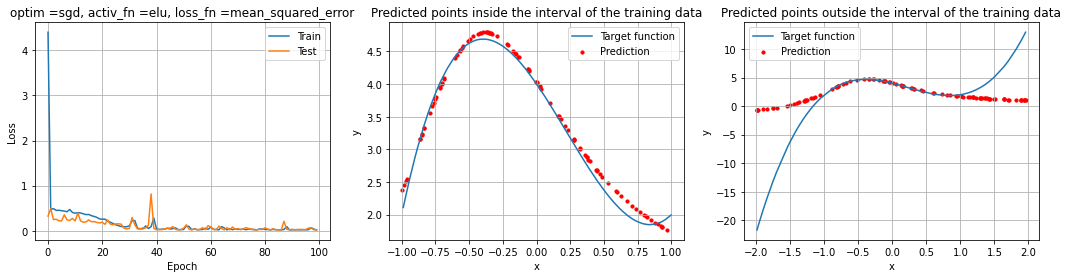

Computing NN with: optim = sgd , activ_fn = elu , loss_fn = mean_absolute_error


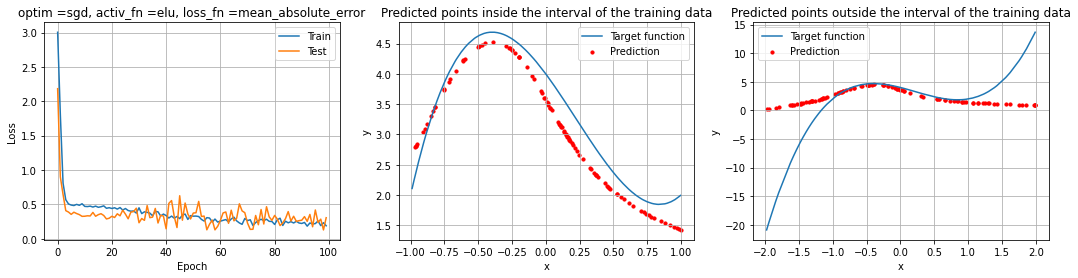

Computing NN with: optim = adam , activ_fn = elu , loss_fn = mean_squared_error


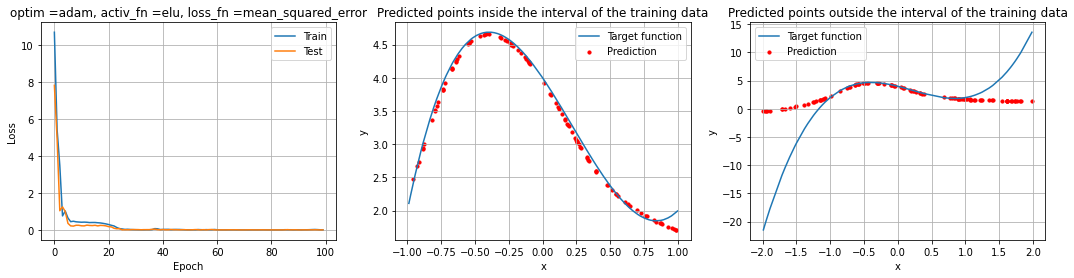

Computing NN with: optim = adam , activ_fn = elu , loss_fn = mean_absolute_error


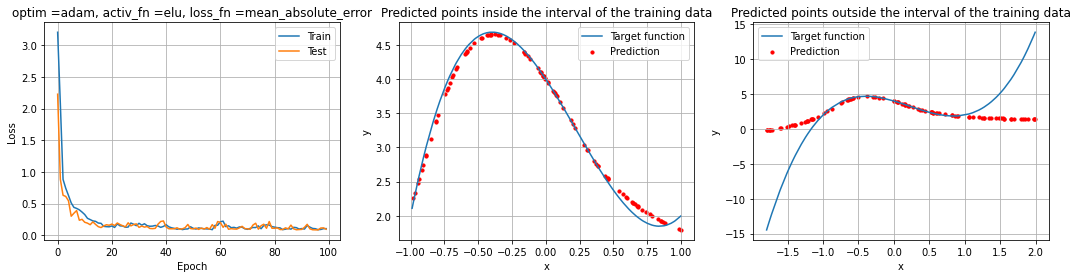

In [9]:
N_layers=10
N_neurons_per_layer=40

activ_fns=['relu', 'elu']
optims=['sgd', 'adam']
loss_fns=['mean_squared_error', 'mean_absolute_error']

index = 1
for activ_fn in activ_fns:
    for optim in optims:
        for loss_fn in loss_fns:
            print("Computing NN with: optim =", optim,", activ_fn =",activ_fn, ", loss_fn =",loss_fn)
            model = get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)
            history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=nepochs,
                                shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
            
            plt.figure(index, figsize = (18, 4))
            # Plot training & validation loss values
            plt.subplot(1, 3, 1)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title("optim ="+str(optim)+", activ_fn ="+str(activ_fn)+", loss_fn ="+str(loss_fn))
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='best')
            plt.grid(True)
            # Plot prediction on points inside the interval of the training data
            plt.subplot(1, 3, 2)
            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model.predict(x_predicted)
            plt.scatter(x_predicted, y_predicted,color='r', s=10, label="Prediction")
            plt.plot(x_target, y_target, label="Target function")
            plt.title("Predicted points inside the interval of the training data")
            plt.ylabel('y')
            plt.xlabel('x')
            plt.grid(True)
            plt.legend()
            # Plot prediction on points outside the interval of the training data
            plt.subplot(1, 3, 3)
            x_test = np.random.uniform(-2, 2, 100)
            y_test = np.random.normal(4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3, sigma)
            x_test.sort()
            y_test_target = 4. - 3.*x_test - 2.*x_test**2 + 3.*x_test**3

            y_predicted = model.predict(x_test)

            plt.scatter(x_test, y_predicted, color='r', s=10, label="Prediction")
            plt.plot(x_test, y_test_target, label="Target function")
            plt.title("Predicted points outside the interval of the training data")
            plt.ylabel('y')
            plt.xlabel('x')
            plt.grid(True)
            plt.legend()

            plt.show()
            
            index=index+1

La maggior parte delle reti neurali sembra funzionare adeguatamente nell'intervallo richiesto in cui sono stati infatti generati i training set. Il punti al di fuori invece non vengono riprodotti con accuratezza da nessuna.

I risultati migliori sembrano provenire da modelli ne troppo semplici ne troppo complessi rispetto alla dimensione del training set. Questo è dovuto al *bias-variance-trade-off*: se il modello è troppo complesso, ossia ha troppi parametri rispetto alla grandezza del traning set, si ottengono risultati peggiori che con una rete più semplice. Per questo motivo risultati ottenuti con $N_{layers}=5$ possono essere peggiori di quelli ottenuti con $N_{layers}=10$, probabilmente a causa di *underfitting*; e risultati con $N_{layers}=20$ possono essere peggiori poichè si sperimenta *overfitting*.

### Esercizio 11.3

Estendere il modello affinchè riproduca una semplice funzione trigonometrica 2D: $$f(x,y)=\sin{x^2+y^2}$$
nell'intervallo $x \in [-3/2,3/2] \text{  e  } y \in [-3/2,3/2]$

In [17]:
# Generate training inputs
x_train = np.random.uniform(-1.5, 1.5, 1000)
y_train =np.random.uniform(-1.5, 1.5, 1000)
x_valid = np.random.uniform(-1.5, 1.5, 500)
y_valid = np.random.uniform(-1.5, 1.5, 500)

z_target = np.sin(x_valid**2+y_valid**2)

sigma=0.2 
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma)
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

data_train=np.array([x_train, y_train]).T
data_valid=np.array([x_valid, y_valid]).T

In [18]:
#Definisco una funzione che mi restituisca un modello con: input_shape(2,),'mse metrics'
# e con specifici parametri richiesti: N_layers, N_neurons_per_layer, activ_fn, 
#optim, loss_fn
def get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn):
    
    model = keras.models.Sequential()
    
    #Aggiungo un input layer
    model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn, input_shape=(2,)))
    
    #Aggiungo dei deep layer
    for i in range(1, N_layers-1):
        model.add(keras.layers.Dense(N_neurons_per_layer, activation=activ_fn))
        
    #Aggiungo un output layer
    model.add(keras.layers.Dense(1, activation=activ_fn))
    
    model.compile(loss=loss_fn, optimizer=optim, metrics=['mse'])

    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 2,911
Trainable params: 2,911
Non-trainable params: 0
_________________________________________________________________


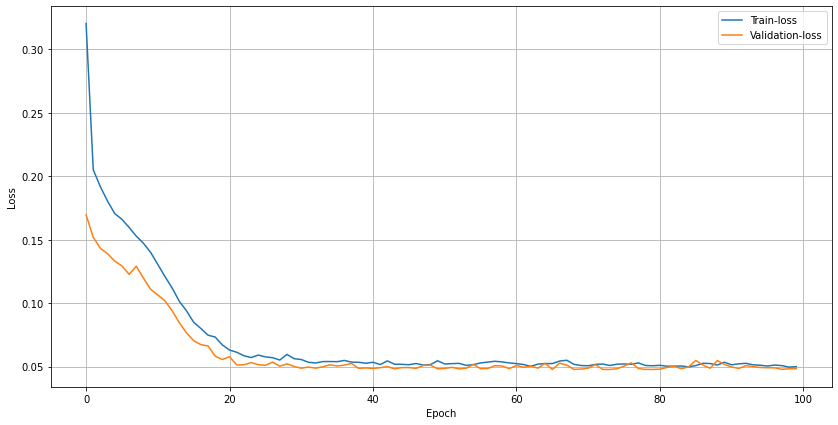

In [19]:
# Imposto i parametri del modello
N_layers = 5
N_neurons_per_layer = 30
nepochs = 100
activ_fn = 'relu'
optim = 'adam'
loss_fn = 'mse'

# Costruisco il modello
model = get_NN(N_layers, N_neurons_per_layer, activ_fn, optim, loss_fn)
model.summary()

# Training
history = model.fit(x=data_train, y=z_train, batch_size=32, epochs=nepochs, 
                    shuffle=True, validation_data=(data_valid, z_valid), verbose=0)

# Plotto training & validation loss values
plt.figure(figsize = (14, 7))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train-loss', 'Validation-loss'], loc='best')
plt.grid(True)

plt.show()


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


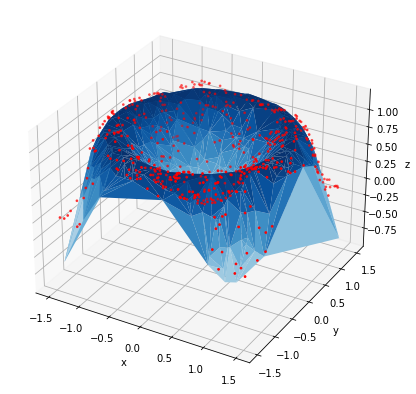

In [20]:
fig = plt.figure(figsize = (14, 7))
ax = fig.gca(projection='3d')

ax.plot_trisurf(x_valid, y_valid, z_target, linewidth=0.2, antialiased=True, cmap=cm.Blues)
x_predicted = np.random.uniform(-1.5, 1.5, 500)
y_predicted = np.random.uniform(-1.5, 1.5, 500)
data_predicted = np.array([x_predicted, y_predicted]).T
z_predicted = model.predict(data_predicted)
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', s=3)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

Il modello sembra riprodurre adeguatamente la funzione rischiesta.